In [1]:
# Import general relevant libraries
import os
import time
import random
import cv2
import numpy as np
import qcf
import matplotlib.pyplot as plt

#os.getcwd()

# Import Dataset (original images)

In [2]:
# Specify Input Path
os.chdir('C:/Users/quint/OneDrive/qthesis/02_datasets/visual_images/original_images')

#Import unlabeled images
die_shot = cv2.imread('AMD_9085_Die.jpg')
delayered_shot = cv2.imread('AMD_9085_Delayered.jpg')
#Import labeled images in grayscale (,0) and convert to binary with custom function
#Save not in Boolean, so I can save them to the drive later
buried = qcf.gray_to_binary(cv2.imread('AMD_9085_Buried.png',0))
diffusion = qcf.gray_to_binary(cv2.imread('AMD_9085_Diffusion.png',0))
metal = qcf.gray_to_binary(cv2.imread('AMD_9085_Metal.png',0))
polysilicon = qcf.gray_to_binary(cv2.imread('AMD_9085_Polysilicon.png',0))
vias = qcf.gray_to_binary(cv2.imread('AMD_9085_Vias.png',0))

# Categorize images
dataset = [die_shot, delayered_shot, buried, diffusion, metal, polysilicon, vias]
unlabeled_images = [die_shot, delayered_shot]
labeled_images = [buried, diffusion, metal, polysilicon, vias]

# Sanity Check: if all images are numpy arrays
for image in dataset:
    print(type(image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
buried_bool = cv2.imread('AMD_9085_Buried.png',0).astype('bool')
diffusion_bool = cv2.imread('AMD_9085_Diffusion.png',0).astype('bool')
metal_bool = cv2.imread('AMD_9085_Metal.png',0).astype('bool')
polysilicon_bool = cv2.imread('AMD_9085_Polysilicon.png',0).astype('bool')
vias_bool = cv2.imread('AMD_9085_Vias.png',0).astype('bool')

labeled_images_bool = [buried_bool, diffusion_bool, metal_bool, polysilicon_bool, vias_bool]

# Sanity Check: if all labeled images are binary with boolean values
for image in labeled_images_bool:
    print(image.shape, image.dtype)
    unique, counts = np.unique(image, return_counts=True)
    print(unique), print(counts)
    print('---------------------')

(5352, 7267) bool
[False  True]
[38152829   740155]
---------------------
(5352, 7267) bool
[False  True]
[27139283 11753701]
---------------------
(5352, 7267) bool
[False  True]
[17801106 21091878]
---------------------
(5352, 7267) bool
[False  True]
[29203973  9689011]
---------------------
(5352, 7267) bool
[False  True]
[37618077  1274907]
---------------------


(5352, 7267, 3)


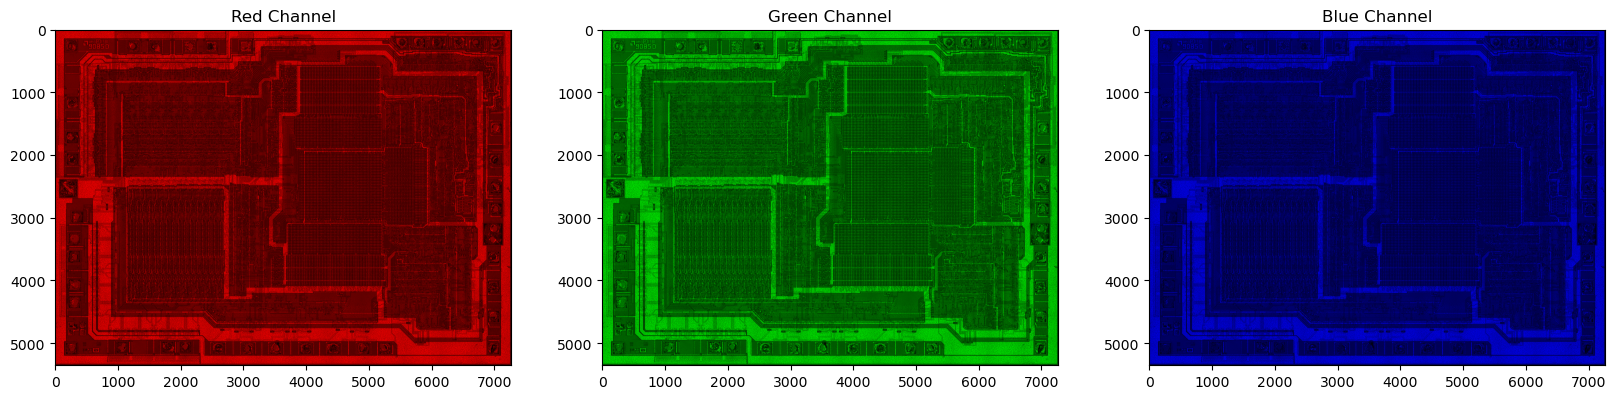

(5352, 7267, 3)


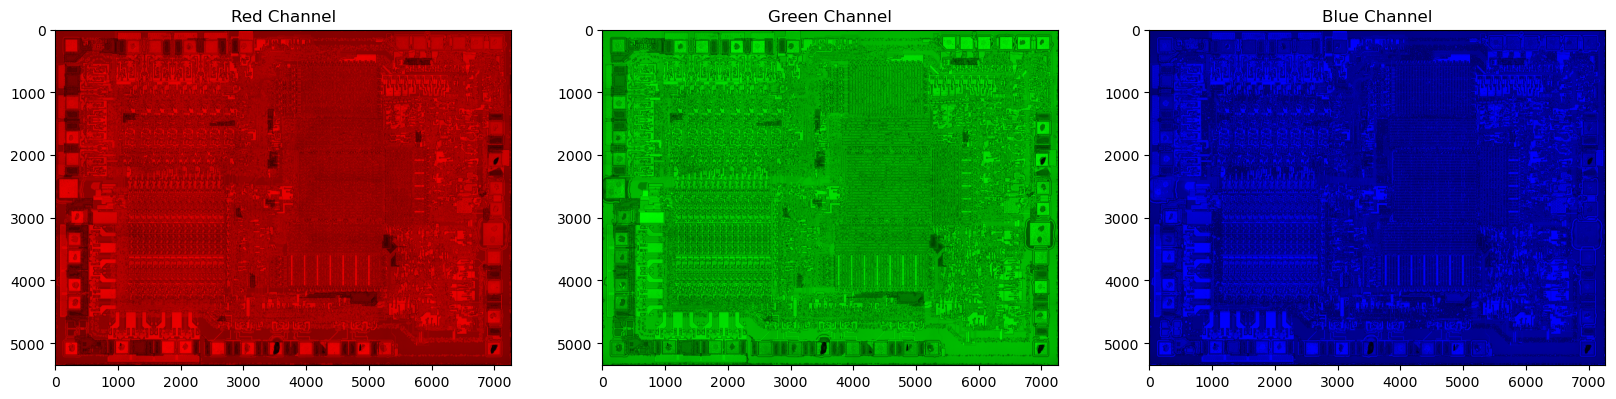

In [52]:
# Sanity Check - Unlabeled images have RGB colormap. 

for image in unlabeled_images: 
    print(image.shape)
    # Create copies of the image
    red_channel_only = image.copy()
    green_channel_only = image.copy()
    blue_channel_only = image.copy()

    # Zero out the other channels
    red_channel_only[:, :, 1] = 0
    red_channel_only[:, :, 2] = 0

    green_channel_only[:, :, 0] = 0
    green_channel_only[:, :, 2] = 0

    blue_channel_only[:, :, 0] = 0
    blue_channel_only[:, :, 1] = 0

    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(20, 20))

    # Plot each color channel
    ax[0].imshow(red_channel_only)
    ax[0].set_title('Red Channel')
    ax[1].imshow(green_channel_only)
    ax[1].set_title('Green Channel')
    ax[2].imshow(blue_channel_only)
    ax[2].set_title('Blue Channel')
    plt.show()


In [53]:
# Sanity Check - Check for Normal Distribution in Unlabeled Images. 
# N > 5000 --> Kolmogorov-Smirnov test for goodness of fit

from scipy import stats
for image in unlabeled_images: 
    # Flatten each color channel and calculate the Shapiro-Wilk statistic and p-value
    red_channel_p = stats.kstest(image[:,:,0].flatten(), stats.norm.cdf)
    green_channel_p = stats.kstest(image[:,:,1].flatten(), stats.norm.cdf)
    blue_channel_p = stats.kstest(image[:,:,2].flatten(), stats.norm.cdf)

    print(f'Red channel p-value: {red_channel_p}')
    print(f'Green channel p-value: {green_channel_p}')
    print(f'Blue channel p-value: {blue_channel_p}')


Red channel p-value: KstestResult(statistic=0.9999997676092084, pvalue=0.0)
Green channel p-value: KstestResult(statistic=0.9999999742884211, pvalue=0.0)
Blue channel p-value: KstestResult(statistic=0.9999996390513174, pvalue=0.0)
Red channel p-value: KstestResult(statistic=0.9999999475902559, pvalue=0.0)
Green channel p-value: KstestResult(statistic=0.9999997418976302, pvalue=0.0)
Blue channel p-value: KstestResult(statistic=0.9999997933207866, pvalue=0.0)


In [54]:
# Check for Min Max values for normalization post train test split
for image in unlabeled_images:
    print(f'Min: {np.min(image)}, Max: {np.max(image)}')
    print(f'Mean: {np.mean(image)}, Median: {np.median(image)}')

Min: 0, Max: 255
Mean: 109.48918070501696, Median: 92.0
Min: 0, Max: 255
Mean: 158.59708278833358, Median: 157.0


In [55]:
# Save binary images for visual inspection
# Specify Output Path
os.chdir('C:/Users/quint/OneDrive/qthesis/02_datasets/visual_images/binary_image_labels')
cv2.imwrite('buried_binary.png', buried)
cv2.imwrite('diffusion_binary.png', diffusion)
cv2.imwrite('metal_binary.png', metal)
cv2.imwrite('polysilicon_binary.png', polysilicon)
cv2.imwrite('vias_binary.png', vias)

# Save unprocessed unlabeled images (new location)
# Specify Output Path
os.chdir('C:/Users/quint/OneDrive/qthesis/02_datasets/visual_images/preprocessed_images/die_shot')
cv2.imwrite('die_shot.jpg', die_shot)
# Specify Output Path
os.chdir('C:/Users/quint/OneDrive/qthesis/02_datasets/visual_images/preprocessed_images/delayered_shot')
cv2.imwrite('delayered_shot.jpg', delayered_shot)

True

# Labeled Image Stacking

In [56]:
# Stack the labeled images with boolen values in alphabetical order
labels = np.stack((buried_bool, diffusion_bool, metal_bool, polysilicon_bool, vias_bool), axis=2)

# Sanity Check: 5 channels = 5 labels
print(labels.shape)

(5352, 7267, 5)


# Image Variant Generation (Concatenation / Fusion)

1. Die-shot (JDI) <br />
    (not incl. Delayered Shot, which has layers removed. Unlike the Die Shot that still contains all layers)
2. Delayered-shot (JDE) <br />
    (not incl. Die-Shot, which can reveal hidden layers better for label-specific training)
3. Channel-wise image concatenation (CC)
4. Simple Averaging (SA)

In [60]:
# Just the original die shot
justdie = die_shot

min_value = np.amin(justdie)
max_value = np.amax(justdie) 
mean_value = np.mean(justdie)

# Print the minimum, maximum, and mean values
print("Minimum value:", min_value), print("Maximum value:", max_value), print("Mean value:", mean_value)
print(justdie.dtype, justdie.shape)

Minimum value: 0
Maximum value: 255
Mean value: 109.48918070501696
uint8 (5352, 7267, 3)


In [61]:
# Just the delayered shot
justdelayered = delayered_shot

min_value = np.amin(justdelayered)
max_value = np.amax(justdelayered) 
mean_value = np.mean(justdelayered)

# Print the minimum, maximum, and mean values
print("Minimum value:", min_value), print("Maximum value:", max_value), print("Mean value:", mean_value)
print(justdelayered.dtype, justdelayered.shape)

Minimum value: 0
Maximum value: 255
Mean value: 158.59708278833358
uint8 (5352, 7267, 3)


In [62]:
# Channel-wise Concatenation: first 3 channels consisting of die-shot, last 3 channels consisting of delayered-shot
concat = np.concatenate([die_shot, delayered_shot], axis=2)

min_value = np.amin(concat)
max_value = np.amax(concat) 
mean_value = np.mean(concat)

# Print the minimum, maximum, and mean values
print("Minimum value:", min_value), print("Maximum value:", max_value), print("Mean value:", mean_value)
print(concat.dtype, concat.shape)

Minimum value: 0
Maximum value: 255
Mean value: 134.04313174667527
uint8 (5352, 7267, 6)


In [64]:
simpavg = (die_shot + delayered_shot) / 2.0

min_value = np.amin(simpavg)
max_value = np.amax(simpavg) 
mean_value = np.mean(simpavg)

# Print the minimum, maximum, and mean values
print("Minimum value:", min_value), print("Maximum value:", max_value), print("Mean value:", mean_value)
print(simpavg.dtype, simpavg.shape)

Minimum value: 0.0
Maximum value: 127.5
Mean value: 67.10905863295721
float64 (5352, 7267, 3)


# Image Tiling

In [69]:
# Set Tilesize Options
tile_size1 = (256,256)
tile_size2 = (512,512)

In [70]:
# Labeled Images Tiling
labels256 = qcf.bool_label_tiling(labels, tile_size1)
labels512 = qcf.bool_label_tiling(labels, tile_size2)
print(f'labels 256 shape & type: {labels256.shape, labels256.dtype}')
print(f'labels 512 shape & type: {labels512.shape, labels512.dtype}')

overlapping height: 0.4 %
overlapping width: 2.0 %
overlapping height: 5.5 %
overlapping width: 5.7 %
labels 256 shape & type: ((609, 256, 256, 5), dtype('bool'))
labels 512 shape & type: ((165, 512, 512, 5), dtype('bool'))


In [71]:
# Die Shot Image Tiling
justdie256 = qcf.image_tiling(justdie, tile_size1)
justdie512 = qcf.image_tiling(justdie, tile_size2)
print(f'justdie 256 shape & type: {justdie256.shape, justdie256.dtype}')
print(f'justdie 512 shape & type: {justdie512.shape, justdie512.dtype}')

overlapping height: 0.4 %
overlapping width: 2.0 %
overlapping height: 5.5 %
overlapping width: 5.7 %
justdie 256 shape & type: ((609, 256, 256, 3), dtype('uint8'))
justdie 512 shape & type: ((165, 512, 512, 3), dtype('uint8'))


In [72]:
# Delayered Shot Image Tiling
justdelayered256 = qcf.image_tiling(justdelayered, tile_size1)
justdelayered512 = qcf.image_tiling(justdelayered, tile_size2)
print(f'justdelayered 256 shape & type: {justdelayered256.shape, justdelayered256.dtype}')
print(f'justdelayered 512 shape & type: {justdelayered512.shape, justdelayered512.dtype}')

overlapping height: 0.4 %
overlapping width: 2.0 %
overlapping height: 5.5 %
overlapping width: 5.7 %
justdelayered 256 shape & type: ((609, 256, 256, 3), dtype('uint8'))
justdelayered 512 shape & type: ((165, 512, 512, 3), dtype('uint8'))


In [73]:
# Concatenated Image Tiling
concat256 = qcf.image_tiling(concat, tile_size1)
concat512 = qcf.image_tiling(concat, tile_size2)
print(f'concat 256 shape & type: {concat256.shape, concat256.dtype}')
print(f'concat 512 shape & type: {concat512.shape, concat512.dtype}')

overlapping height: 0.4 %
overlapping width: 2.0 %
overlapping height: 5.5 %
overlapping width: 5.7 %
concat 256 shape & type: ((609, 256, 256, 6), dtype('uint8'))
concat 512 shape & type: ((165, 512, 512, 6), dtype('uint8'))


In [74]:
# Simpavg Image Tiling
simpavg256 = qcf.image_tiling(simpavg, tile_size1)
simpavg512 = qcf.image_tiling(simpavg, tile_size2)
print(f'simpavg 256 shape & type: {simpavg256.shape, simpavg256.dtype}')
print(f'simpavg 512 shape & type: {simpavg512.shape, simpavg512.dtype}')

overlapping height: 0.4 %
overlapping width: 2.0 %
overlapping height: 5.5 %
overlapping width: 5.7 %
simpavg 256 shape & type: ((609, 256, 256, 3), dtype('float64'))
simpavg 512 shape & type: ((165, 512, 512, 3), dtype('float64'))


# Export Preprocessed Labeled Images

In [83]:
# Specify Output Path
os.chdir('C:/Users/quint/OneDrive/qthesis/02_datasets/matrices/preprocessed_matrices/')
# Save the preprocessed stacked labels
np.save('labels256.npy', labels256)
np.save('labels512.npy', labels512)

# Export Preprocessed Unlabeled Images

In [84]:
# Specify Output Path
os.chdir('C:/Users/quint/OneDrive/qthesis/02_datasets/matrices/preprocessed_matrices/')
# Save the preprocessed images
np.save('justdie256.npy', justdie256)
np.save('justdie512.npy', justdie512)

np.save('justdelayered256.npy', justdelayered256)
np.save('justdelayered512.npy', justdelayered512)

np.save('concat256.npy', concat256)
np.save('concat512.npy', concat512)

np.save('simpavg256.npy', simpavg256)
np.save('simpavg512.npy', simpavg512)